In [21]:
import cv2, os
import numpy as np
from matplotlib import pyplot as plt
script_dir = os.getcwd() # Get the directory of the current script

In [22]:
def ipynb_cv_imshow(title, img, cv=True):
    """
    Display an image in a Jupyter Notebook cell.
    """
    if img is None:
        print("Image not found or could not be read.")
        return
    plt.figure(figsize=(10, 10))
    plt.title(title)
    if cv:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()

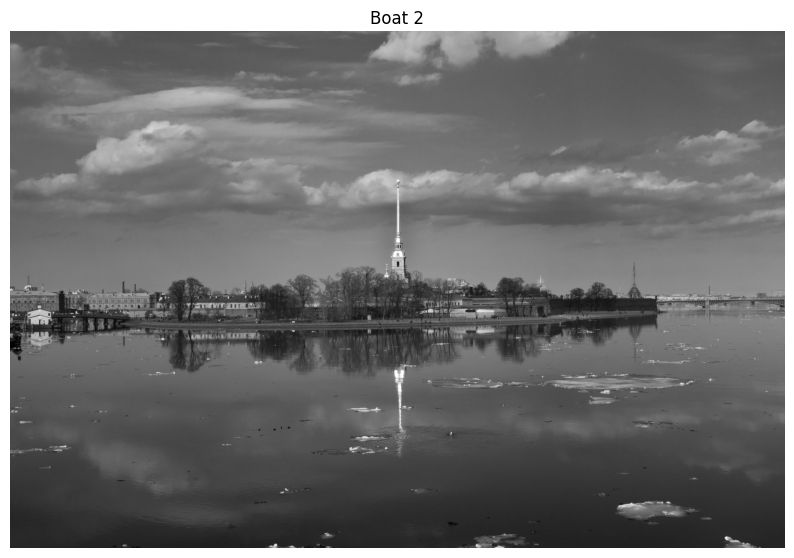

In [23]:
img1 = cv2.imread(os.path.join(script_dir, 'boat2.jpg'), cv2.IMREAD_GRAYSCALE)
ipynb_cv_imshow('Boat 2', img1)

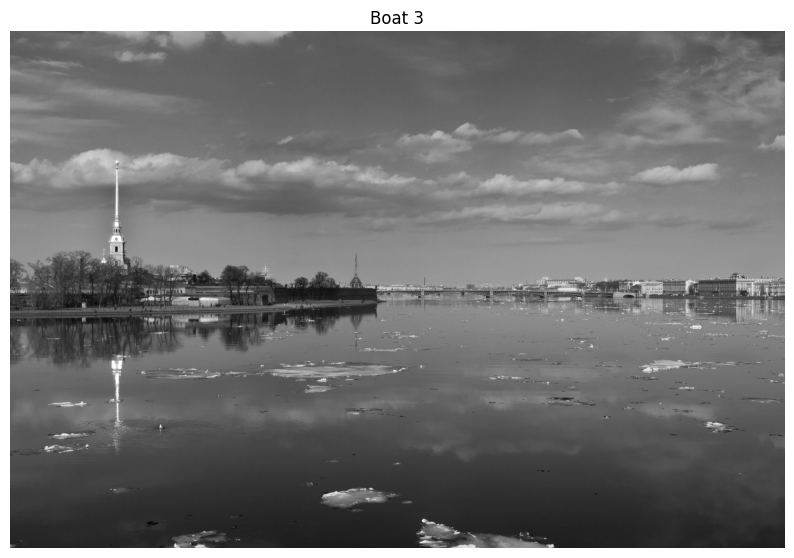

In [24]:
img2 = cv2.imread(os.path.join(script_dir, 'boat3.jpg'), cv2.IMREAD_GRAYSCALE)
ipynb_cv_imshow('Boat 3', img2)

In [25]:
# Initialize ORB detector
orb = cv2.ORB_create(nfeatures=500)
# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [26]:
# BFMatcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
bf_matches = bf.match(des1, des2)
bf_matches = sorted(bf_matches, key=lambda x: x.distance)

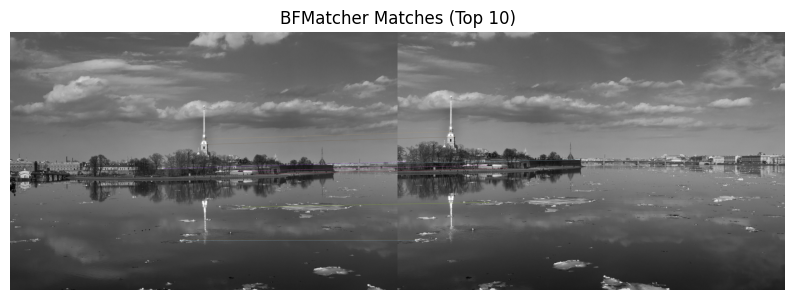

In [27]:
bf_img10 = cv2.drawMatches(img1, kp1, img2, kp2, bf_matches[:10], None, flags=2) # Draw top 10 matches
ipynb_cv_imshow('BFMatcher Matches (Top 10)', bf_img10, cv=False)

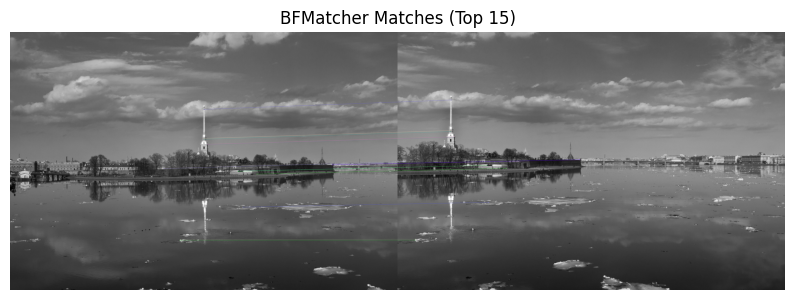

In [28]:
bf_img15 = cv2.drawMatches(img1, kp1, img2, kp2, bf_matches[:15], None, flags=2) # Draw top 15 matches
ipynb_cv_imshow('BFMatcher Matches (Top 15)', bf_img15, cv=False)

In [29]:
# Flann parameters for ORB (use LSH)
FLANN_INDEX_LSH = 6
index_params= dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# For ORB, descriptors must be np.uint8
matches = flann.knnMatch(des1, des2, k=2)
# Sort by distance (first in each pair)
flann_matches = sorted([m[0] for m in matches if len(m) > 0], key=lambda x: x.distance)

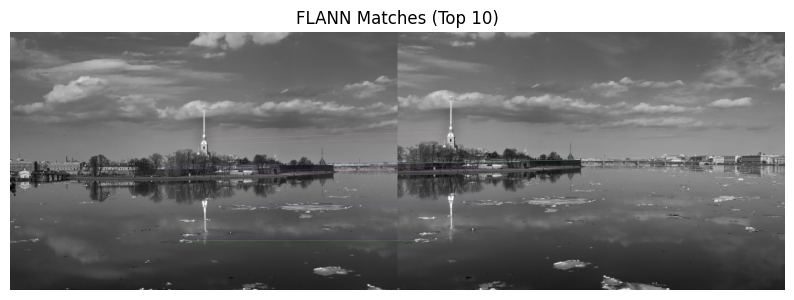

In [30]:
# Draw top 10 matches
flann_img10 = cv2.drawMatches(img1, kp1, img2, kp2, flann_matches[:10], None, flags=2)
ipynb_cv_imshow('FLANN Matches (Top 10)', flann_img10, cv=False)

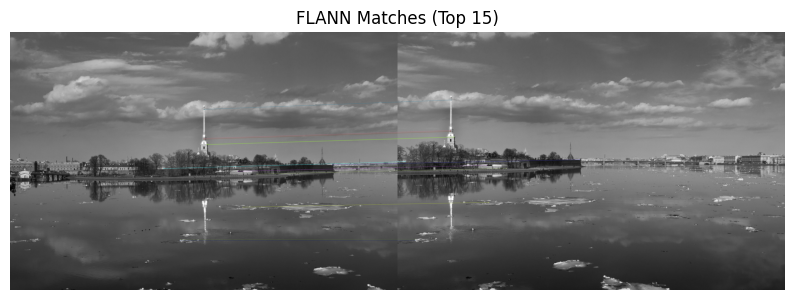

In [31]:
# Draw top 15 matches
flann_img15 = cv2.drawMatches(img1, kp1, img2, kp2, flann_matches[:15], None, flags=2)
ipynb_cv_imshow('FLANN Matches (Top 15)', flann_img15, cv=False)

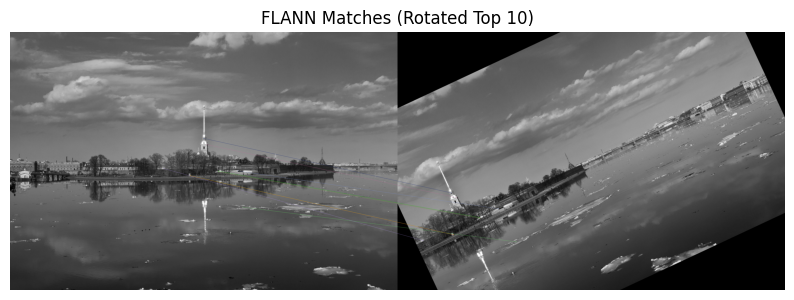

In [32]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR)
    return rotated
rotated_img2 = rotate_image(img2, 25)
# Recompute ORB features on rotated image
kp2r, des2r = orb.detectAndCompute(rotated_img2, None)
# Flann matching
matches_rot = flann.knnMatch(des1, des2r, k=2)
flann_matches_rot = sorted([m[0] for m in matches_rot if len(m) > 0], key=lambda x: x.distance)
# Draw top 10 matches
flann_img_rot10 = cv2.drawMatches(img1, kp1, rotated_img2, kp2r, flann_matches_rot[:10], None, flags=2)
ipynb_cv_imshow('FLANN Matches (Rotated Top 10)', flann_img_rot10, cv=False)

In [33]:
## Confused on the Optional Question.

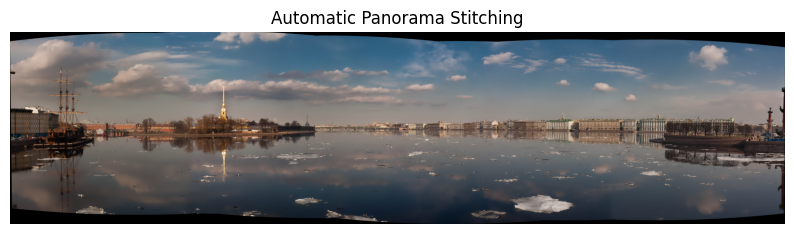

In [34]:
images = [cv2.imread(os.path.join(f'boat{i}.jpg')) for i in range(1, 7)] # Automatic panorama stitching for all boat images
stitcher = cv2.Stitcher_create()
status, pano = stitcher.stitch(images)
if status == cv2.Stitcher_OK:
    # cv2.imwrite('panorama.png', pano)
    ipynb_cv_imshow('Automatic Panorama Stitching', pano)
else:
    print("Can't stitch images, error code =", status)